In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('df.csv')
df.head()


,Unnamed: 0,EEG
0,0,-819.200
1,1,-802.816
2,2,-802.816
3,3,-802.816
4,4,-819.200


In [15]:
df[:200]

,Unnamed: 0,EEG
0,0,-819.200
1,1,-802.816
2,2,-802.816
3,3,-802.816
4,4,-819.200
...,...,...
195,195,-1015.808
196,196,-802.816
197,197,-622.592
198,198,-671.744


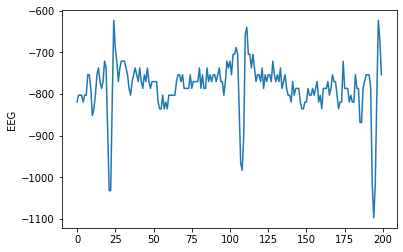

In [16]:
_ = sns.lineplot(x=df[:200].index, y='EEG', data=df[:200])

In [81]:
temp = np.zeros(200)

In [117]:
window = 180

class show_window_data:
    df = df

    def __init__(self):
        self.df_data = df
        self.starting_frame = 0
        self.ending_frame = window
        self.x_axis = np.arange(self.starting_frame, self.ending_frame)
        self.y_axis = df['EEG'].loc[self.starting_frame:self.ending_frame].values
        # Padding
        temp_list = np.zeros(window + 1)
        temp_list[:len(self.y_axis)] = self.y_axis
        self.y_axis = temp_list

    def update(self):
        self.df_data = df

    def new_data_available(self, df):
        self.df_data = df
        if (self.df.index[-1:][0] - self.starting_frame) >= 180:
            self.df_data = df
            self.starting_frame += window
            self.ending_frame += window
    
        self.x_axis = np.arange(self.starting_frame, self.ending_frame+1)
        self.y_axis = self.df['EEG'].loc[self.starting_frame:self.ending_frame].values
        if len(self.y_axis) == window + 1:
            pass
        else:
            temp_list = np.zeros(window + 1)
            temp_list[:len(self.y_axis)] = self.y_axis
            self.y_axis = temp_list

        return self.x_axis, self.y_axis

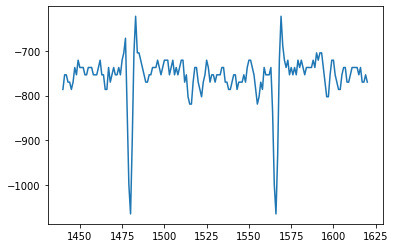

In [127]:
x, y = show_window_data_a.new_data_available(df)
sns.lineplot(x=x, y=y)